In [5]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We're going to compare how students perform on college entrance exams at two different high schools in the U.S.
# One schools takes the ACT and the other takes the SAT

SAT_scores = [690,330,600,350,540,440,650,480,570,420,360,620]
ACT_scores = [24,18,32,23,22,26,18,23,17,28,15,20]

 
columns = ['SAT', 'ACT']

score_df = pd.DataFrame(np.array([SAT_scores, ACT_scores]).T, columns = columns)

score_df.head()

,SAT,ACT
0,690,24
1,330,18
2,600,32
3,350,23
4,540,22


## What is Transformation

To make a reasonable comparison, we're going to need to transform the data in some way. Specifically, when we talk about a transformation, all that means is we're going to apply some function, $f(x)$, to each input, and get our new outputs. 

## Scaling Techniques

Max-Min Normalization

x' = (x - min(x)) / max(x) - min(x)



But in our case, it might be more useful to do something like standardization, so that all the values are compared together. 

x' = x- u / std.dev

In [7]:
SAT_mean = np.mean(SAT_scores)
SAT_std = np.std(SAT_scores)

ACT_mean = np.mean(ACT_scores)
ACT_std = np.std(ACT_scores)

standardized_SAT = (SAT_scores - SAT_mean ) / SAT_std
standardized_ACT = (ACT_scores - ACT_mean ) / ACT_std

print(standardized_SAT)
print(standardized_ACT)

[ 1.55814575 -1.46032494  0.80352808 -1.29263213  0.30044963 -0.53801445
  1.22276012 -0.20262882  0.55198885 -0.70570727 -1.20878572  0.9712209 ]
[ 0.38818157 -0.88223084  2.08206479  0.17644617 -0.03528923  0.81165237
 -0.88223084  0.17644617 -1.09396624  1.23512318 -1.51743705 -0.45876004]


(array([2., 1., 0., 2., 0., 1., 0., 1., 1., 2., 1., 1.]),
 array([-1.46032494, -1.20878572, -0.95724649, -0.70570727, -0.45416804,
        -0.20262882,  0.0489104 ,  0.30044963,  0.55198885,  0.80352808,
         1.0550673 ,  1.30660653,  1.55814575]),
 <BarContainer object of 12 artists>)

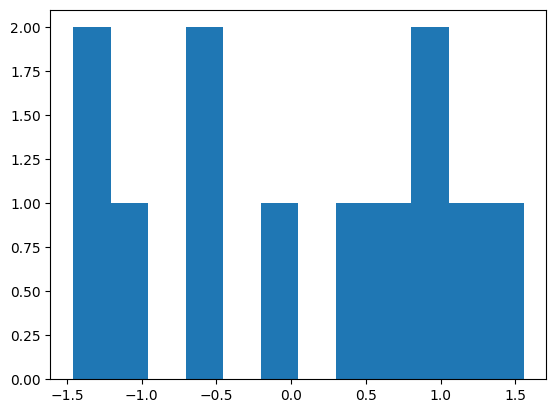

In [8]:
normalized_df = pd.DataFrame({'SAT' : standardized_SAT, 'ACT': standardized_ACT})

plt.hist(normalized_df['SAT'], bins=12)


(array([1., 1., 2., 1., 1., 2., 1., 1., 0., 1., 0., 1.]),
 array([-1.51743705, -1.21747856, -0.91752008, -0.61756159, -0.3176031 ,
        -0.01764462,  0.28231387,  0.58227236,  0.88223084,  1.18218933,
         1.48214781,  1.7821063 ,  2.08206479]),
 <BarContainer object of 12 artists>)

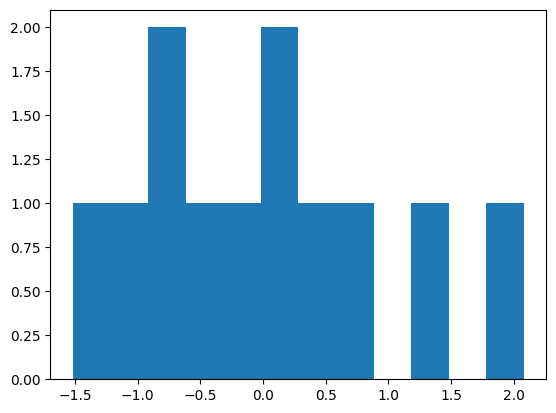

In [9]:
plt.hist(normalized_df['ACT'], bins=12)


In [ ]:
#  Of course, while we can standardize data, this doesn't necessarily mean that the result will actually follow a normal bell curve, if the data aren't normal to begin with. 
# This can pose a challenge when we want to apply statistical tools that assume some degree of normality, such as a z or t-test. Fortunately, transformations can help us address this issue quite well.

<BarContainer object of 13 artists>

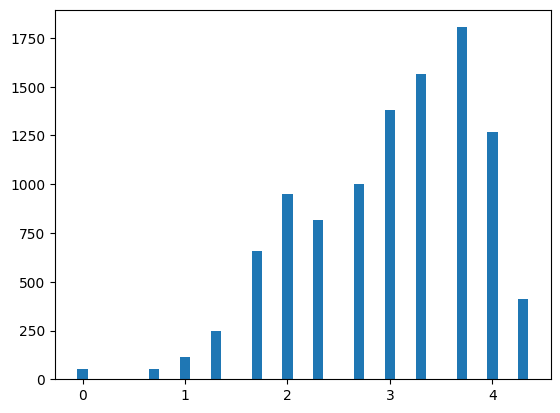

In [10]:
# Now, for a follow-up question, what if we had something that was left skewed? To illustrate, this we have obtained data from University of Michigan's academic reporting tools. 
# For the EECS281 course, which is Data Structures and Algorithms. We've changed the final grades A plus, A and so forth into their corresponding grade points instead.
# Where we've assigned a plus a 4.3. So in this we'll have an n of students being just over 10,000. So 10,312, and we'll input our grades, percentages, counts, and let's plot this.


N_students = 10312
grade_labels = [0,0.7,1.0,1.3,1.7,2.0,2.3,2.7,3.0,3.3,3.7,4.0,4.3]
percentages = [0.5, 0.5, 1.1, 2.4, 6.4, 9.2, 7.9, 9.7, 13.4, 15.2, 17.5, 12.3, 4.0]
counts = [(x / 100) * N_students for x in percentages]
plt.bar(grade_labels, counts, width = 0.1)

[0.         0.01855057 0.05408329 0.11882098 0.2657112  0.43266631
 0.65803137 1.06452136 1.46024878 1.94359113 2.7394808  3.46133045
 4.3       ]


<BarContainer object of 13 artists>

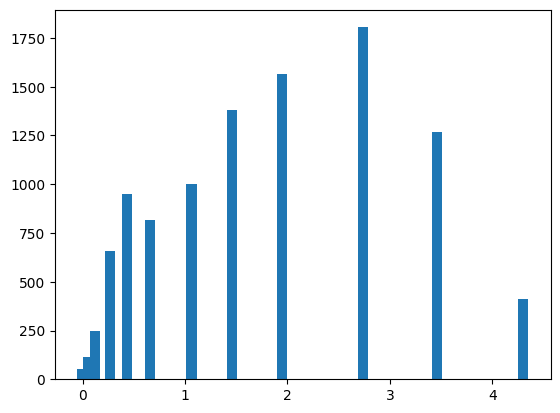

In [11]:
# For left-skewed data, we can use a power transform

transformed_grades = np.power(grade_labels, 3 )
transformed_grades = (transformed_grades/max(transformed_grades)) * 4.3
print(transformed_grades)
plt.bar(transformed_grades, counts, width=0.1)

In [ ]:
# Notice that the plot looks a lot closer to a normal distribution, even though this does have the effect of compressing some of data points along the right side. And creating gaps towards the left. 
# This is just because we chose to discretize the grades. Rather than using an individual data points, which would lead to something more continuous-looking

### Linearity

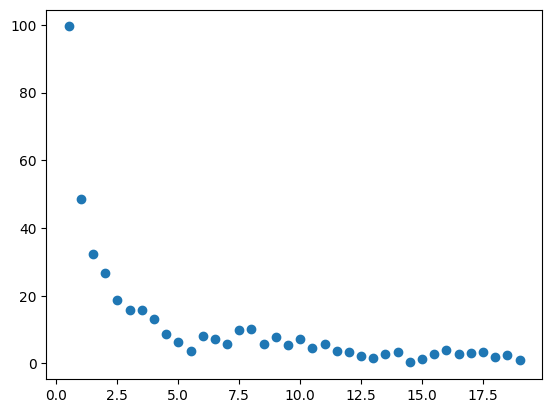

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
mass = np.arange(0.5, 19.5, 0.5)  # This should give you 38 values to match the acceleration list
acceleration = [99.53, 48.67, 32.21, 26.64, 18.63, 15.92, 15.85, 13.27, 8.57, 6.33, 3.6,
                8.12, 7.12, 5.77, 9.94, 10.3, 5.87, 7.69, 5.49, 7.24, 4.45, 5.83, 3.63, 3.35,
                2.12, 1.52, 2.82, 3.43, 0.28, 1.38, 2.90, 4.04, 2.93, 3.21, 3.51, 2.04, 2.42, 0.89]

plt.scatter(mass, acceleration)


plt.show()


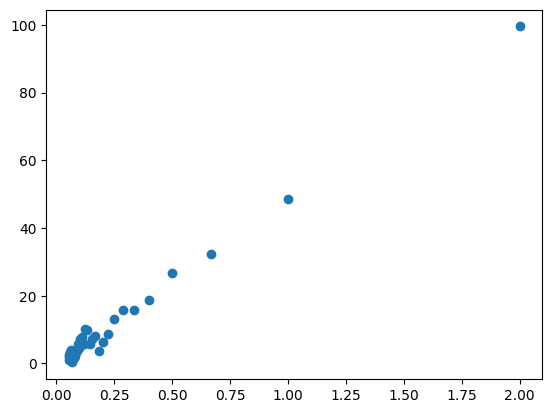

In [17]:
# We want to find out how much force the curler is applying, but it's kind of difficult to tell just by looking at the curve above.

# Can we transform one of the variables to get something that looks a bit easier to work with? 
# Well if we take the reciprocal of mass and call it x, we'll get a = Fx

plt.scatter(1 / mass, acceleration)

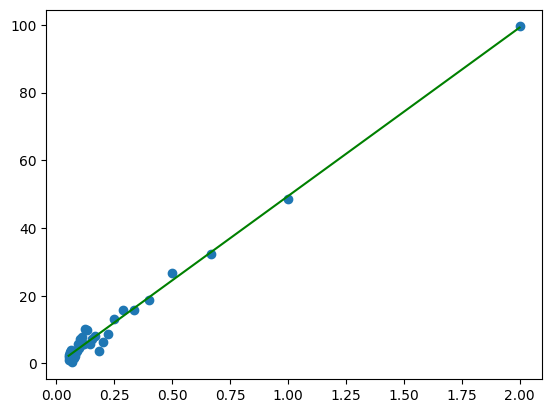

In [18]:
# Linearizing a function comes with benefits aside from just looking easier to work with. 
# For instance, while we'll save the details of this for later, we can plot the trend line and get the slope and intercept of the line.

plt.scatter(1 / mass, acceleration)

# Slope and intercept of the line of best fit

F, b = np.polyfit(1 / mass, acceleration, 1)

abline_values = [F * x + b for x in 1/ mass]
plt.plot(1 / mass, abline_values, 'g')


### Transformations: Making life easier (or harder?)

So to recap, transformations allow us to linearize functions, which may be easier to manipulate or allow us to infer other details were interested in. Now, at this point you might be thinking that transformations feel a bit, well, unnatural. Or that it's not quite clear what techniques should be used and when. But transformations do often work well in practice and you'll gain an intuition as we work through more examples throughout the course. In fact, I'll bet you were probably already familiar with the concept before this lecture. For instance, in many real-life situations skills involve transformations such as the pH scale used for measuring acidity levels. Or the decibel scale used for measuring sound waves.